In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# Read data from markdown
table = pd.read_table('results_round_1.md', sep='|')

# Trim all values
table = table.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove junk row + colmumns
table = table[1:]
table = table.drop(table.columns[0], axis=1)
table = table.drop(table.columns[-1], axis=1)

# Remove whitespace from column names
table = table.rename(columns=lambda x: x.strip())
                     
# Remove columns we don't use
table = table.drop(['Published Size (KB)', 'Errors', 'Latency (ms)'], axis=1)

In [121]:
# Split Description column
table['Scenario'], table['Memory Limit'], table['CPU Limit'] = table['Description'].str.split(';', 2).str

# Reorder and remove Description column
cols = table.columns.tolist()
cols = cols[-3:] + cols [1:-3]
table = table[cols]
table

Scenario Memory Limit CPU Limit      RPS CPU (%)  \
1    WeatherApp-RouteToCode          30m      0.25    7,691       2   
2    WeatherApp-RouteToCode          50m      0.25    7,851       2   
3    WeatherApp-RouteToCode         100m      0.25    8,020       2   
4    WeatherApp-RouteToCode         200m      0.25    7,051       2   
5    WeatherApp-RouteToCode          30m       0.5   20,495       4   
..                      ...          ...       ...      ...     ...   
136   WeatherApp-GoFastHttp          30m       4.0  135,164      34   
137   WeatherApp-GoFastHttp          50m       4.0  132,815      34   
138   WeatherApp-GoFastHttp         100m       4.0  134,358      34   
139   WeatherApp-GoFastHttp         200m       4.0  134,043      34   
140   WeatherApp-GoFastHttp         500m       4.0  134,203      35   

    Memory (MB) Avg. Latency (ms) Startup (ms) Build Time (ms)  \
1            27             39.76         1510            2501   
2            32             38.34         1392            2001   
3            32             37.37         1633            1501   
4            30             43.42         1605            2001   
5            26             20.97          708            2001   
..          ...               ...          ...             ...   
136          16             13.47          521            3502   
137          16             13.46          518            4002   
138          15             13.41          519            3502   
139          14             13.25          521            4002   
140          16             13.39          518            3501   

    First Request (ms)  
1                377.9  
2               313.46  
3               396.23  
4               357.48  
5               144.66  
..                 ...  
136               1.21  
137                1.2  
138               1.15  
139               1.27  
140               1.28  

[140 rows x 10 columns]

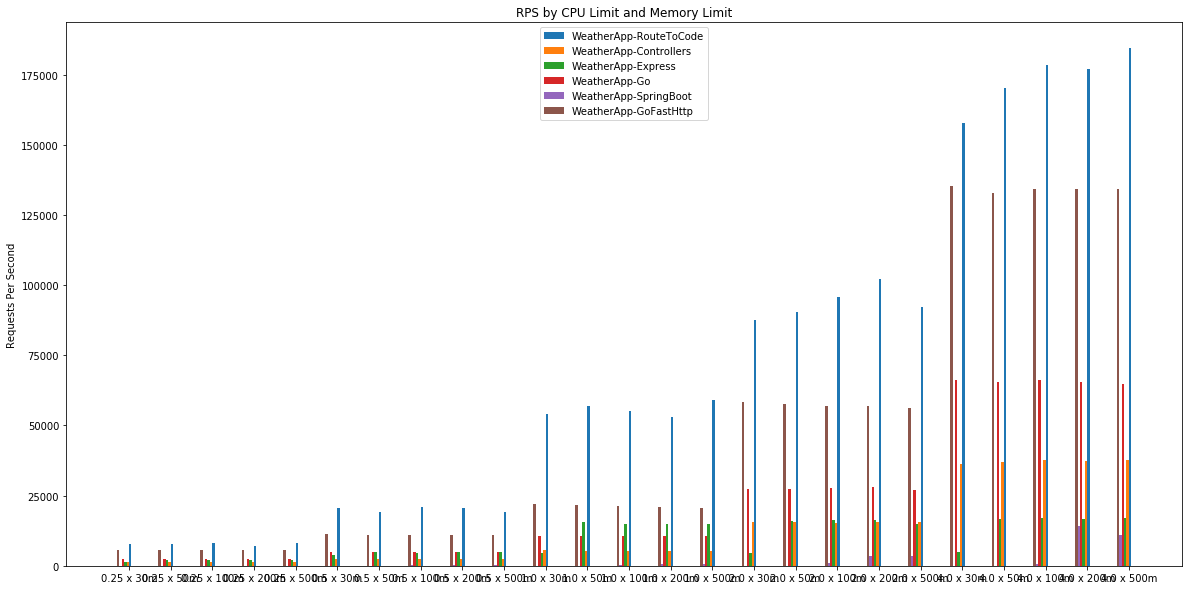

In [142]:
# Build the plot
fig, ax = plt.subplots()
ax.set_title('RPS by CPU Limit and Memory Limit')

scenario_values = table['Scenario'].unique()
cpu_limit_values = table['CPU Limit'].unique()
memory_limit_values = table['Memory Limit'].unique()

ax.set_ylabel('Requests Per Second')

width = 0.35
x_pos = np.arange(cpu_limit_values.size * memory_limit_values.size)

for i, scenario in enumerate(scenario_values):
    x_values = []
    scenario_tables = table[table['Scenario'] == scenario]
    
    for cpu_limit in cpu_limit_values:
        for memory_limit in memory_limit_values:        
            filtered = scenario_tables[(scenario_tables['CPU Limit'] == cpu_limit) & (scenario_tables['Memory Limit'] == memory_limit)]
            mean = pd.to_numeric(filtered['RPS'].str.replace(',', '')).mean()
            x_values.append(mean)
    
    offset = i * (width / scenario_values.size)
    ax.bar(np.subtract(x_pos, offset), x_values, width / scenario_values.size, align='edge', label=scenario)

x_labels = []
for cpu_limit in cpu_limit_values:
        for memory_limit in memory_limit_values:
            x_labels.append(f'{cpu_limit} x {memory_limit}')

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()
fig.set_size_inches(20, 10)

In [81]:
table

Scenario CPU Limit Memory Limit      RPS CPU (%)  \
1    WeatherApp-RouteToCode       30m         0.25    7,691       2   
2    WeatherApp-RouteToCode       50m         0.25    7,851       2   
3    WeatherApp-RouteToCode      100m         0.25    8,020       2   
4    WeatherApp-RouteToCode      200m         0.25    7,051       2   
5    WeatherApp-RouteToCode       30m          0.5   20,495       4   
..                      ...       ...          ...      ...     ...   
136   WeatherApp-GoFastHttp       30m          4.0  135,164      34   
137   WeatherApp-GoFastHttp       50m          4.0  132,815      34   
138   WeatherApp-GoFastHttp      100m          4.0  134,358      34   
139   WeatherApp-GoFastHttp      200m          4.0  134,043      34   
140   WeatherApp-GoFastHttp      500m          4.0  134,203      35   

    Memory (MB) Avg. Latency (ms) Startup (ms) Build Time (ms)  \
1            27             39.76         1510            2501   
2            32             38.34         1392            2001   
3            32             37.37         1633            1501   
4            30             43.42         1605            2001   
5            26             20.97          708            2001   
..          ...               ...          ...             ...   
136          16             13.47          521            3502   
137          16             13.46          518            4002   
138          15             13.41          519            3502   
139          14             13.25          521            4002   
140          16             13.39          518            3501   

    First Request (ms)  
1                377.9  
2               313.46  
3               396.23  
4               357.48  
5               144.66  
..                 ...  
136               1.21  
137                1.2  
138               1.15  
139               1.27  
140               1.28  

[140 rows x 10 columns]